In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('twitter_training.csv')

In [3]:
data.head()

,Unnamed: 0,Channel,Response,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv('twitter_training.csv', names=col_names)

In [5]:
df.head()

,ID,Entity,Sentiment,Content
0,Unnamed: 0,Channel,Response,Text
1,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
3,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
4,2401,Borderlands,Positive,im coming on borderlands and i will murder you...


In [6]:
df.shape

(74683, 4)

In [7]:
df.describe()

,ID,Entity,Sentiment,Content
count,74683,74683,74683,73997
unique,12448,33,5,69490
top,5203,Microsoft,Negative,"At the same time, despite the fact that there ..."
freq,6,2400,22542,172


In [8]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [9]:
df.dropna(axis=0 , inplace=True)

In [10]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [12]:
df.duplicated().sum()

2341

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
df.shape

(71656, 4)

In [15]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21698
Positive      19713
Neutral       17707
Irrelevant    12537
Response          1
Name: count, dtype: int64

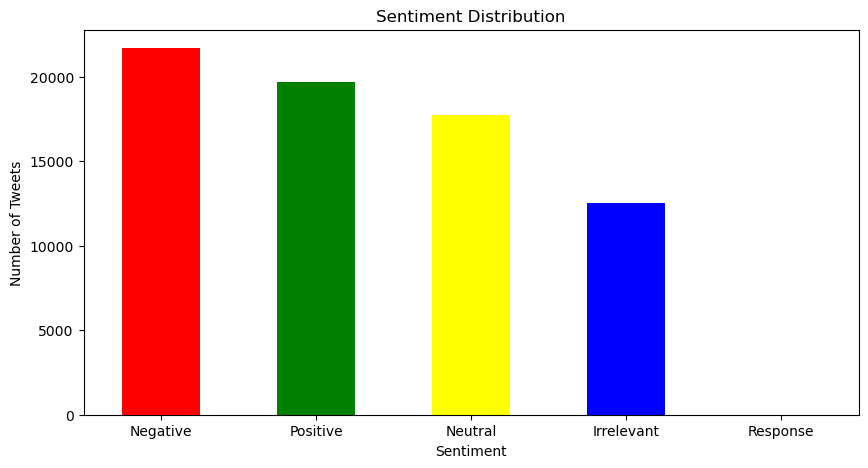

In [17]:
plt.figure(figsize=(10, 5))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [18]:
brand_data = df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Sentiment
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

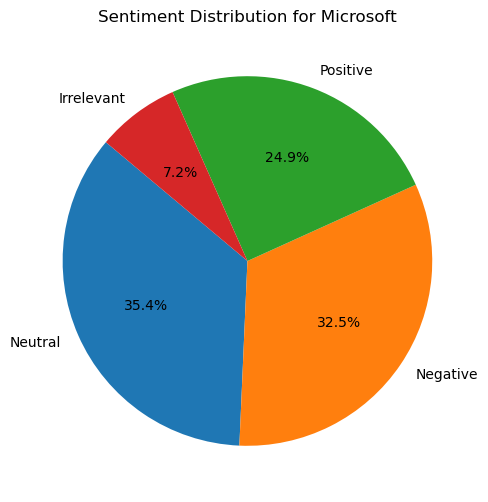

In [19]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()